## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from random import choices,sample
from numpy.lib.stride_tricks import as_strided
import cv2
from tqdm import tqdm

## Hyperparameters

In [2]:
populationNum = 100
MaxiterationPerAutomata = 1000
configurationSize = 10
boardSize = 50
a = 0.5
NumberOfGenerations = 50
configurations = []

## Functions

In [3]:
rules = np.zeros(20)
rules[[3,12,13]] = 1

def plot_automata(array,title = ""):
    plt.figure(figsize=(6.5, 6.5))
    plt.title(title)
    plt.imshow(array, cmap='Greys',  interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

def initialization():
    array = np.zeros((populationNum,50,50))
    configurations = np.random.randint(2, size=(populationNum,10,10))
    array[:,20:30,20:30] = configurations
    return array

def Neighbors(array):
    return cv2.filter2D(np.pad(array, 1, mode='constant'), -1, np.ones((3,3)))[1:-1,1:-1] - array

def step(array):
    result = (Neighbors(array) + array*10).astype(int)
    result = np.where(result >=0, rules[result],result)
    return result

def run(array, Visualization =False):
    maxSize = np.sum(array)
    startSize = np.sum(array)
    history = [array.tolist()]
    for i in range(MaxiterationPerAutomata):
        if Visualization:
            plot_automata(array, i)
            #time.sleep(0.2)
            clear_output(wait = True)
        array = step(array)
        if array.tolist() in history:
            break
        else:
            history.append(array.tolist())
        maxSize = max(maxSize, np.sum(array))
        
        fitness = ((1-a) * (maxSize - startSize) + a * i) if i != (MaxiterationPerAutomata - 1) else 0
    return fitness

def runGeneration(population):
    fitnesses = []
    for i in tqdm(range(populationNum)):
        f = run(population[i,:,:])
        fitnesses.append(f)
    return fitnesses

def selection(fitnessArray):
    fitnessNorm = [float(x)/sum(fitnessArray) for x in fitnessArray]
    top10 = list(np.argsort(fitnessArray)[::-1][:int(0.1 * populationNum)])
    return top10 + choices(np.arange(populationNum), weights= fitnessNorm, k=int(0.9 * populationNum)) 
    
def nextGeneration(population,fitness):
    newPopulation = population[selection(fitness),:,:]
    
    #cross-over
    tmp = newPopulation[55:,:25,:].copy()
    newPopulation[55:,:25,:], newPopulation[10:55,:25,:]  = newPopulation[10:55,:25,:], tmp
    
    #mutation
    for i in range(10, 100):
        if np.random.choice([0,1]) == 1:
            y = np.random.randint(10) + 20
            x = np.random.randint(10) + 20
            newPopulation[i,x,y] = 1 - newPopulation[i,x,y]
    
    return newPopulation

def describe(i,fitness):
    avg = sum(fitness)/len(fitness)
    maximum = max(fitness)
    print("Generation: {}/{}, Max: {:.2f}, Avg: {:.2f}".format(i,NumberOfGenerations,maximum,avg))
    return avg,maximum

## Run and optimize

In [4]:
best = [0] * NumberOfGenerations
avg = [0] * NumberOfGenerations

population = initialization()

for i in range(NumberOfGenerations):
    currentFitness = runGeneration(population)
    avg[i],best[i] = describe(i+1,currentFitness)
    if i != NumberOfGenerations - 1:
        population = nextGeneration(population,currentFitness)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


Generation: 1/50, Max: 519.00, Avg: 115.85


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:19<00:00,  1.26it/s]


Generation: 2/50, Max: 560.00, Avg: 165.07


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:29<00:00,  1.11it/s]


Generation: 3/50, Max: 560.00, Avg: 159.02


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:27<00:00,  1.14it/s]


Generation: 4/50, Max: 615.50, Avg: 157.60


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.16s/it]


Generation: 5/50, Max: 615.50, Avg: 155.75


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.16s/it]


Generation: 6/50, Max: 615.50, Avg: 228.26


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.33s/it]


Generation: 7/50, Max: 615.50, Avg: 246.97


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:51<00:00,  1.71s/it]


Generation: 8/50, Max: 615.50, Avg: 263.86


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:16<00:00,  1.96s/it]


Generation: 9/50, Max: 615.50, Avg: 267.11


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:58<00:00,  1.78s/it]


Generation: 10/50, Max: 615.50, Avg: 265.12


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:58<00:00,  1.78s/it]


Generation: 11/50, Max: 615.50, Avg: 264.33


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:41<00:00,  1.62s/it]


Generation: 12/50, Max: 615.50, Avg: 264.70


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


Generation: 13/50, Max: 615.50, Avg: 275.69


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.55s/it]


Generation: 14/50, Max: 615.50, Avg: 250.71


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:09<00:00,  1.29s/it]


Generation: 15/50, Max: 615.50, Avg: 235.04


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:40<00:00,  1.60s/it]


Generation: 16/50, Max: 615.50, Avg: 258.00


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:03<00:00,  1.24s/it]


Generation: 17/50, Max: 615.50, Avg: 253.75


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:58<00:00,  1.19s/it]


Generation: 18/50, Max: 615.50, Avg: 266.02


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:33<00:00,  1.53s/it]


Generation: 19/50, Max: 615.50, Avg: 325.00


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:09<00:00,  1.30s/it]


Generation: 20/50, Max: 615.50, Avg: 281.54


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:22<00:00,  1.42s/it]


Generation: 21/50, Max: 615.50, Avg: 315.11


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:40<00:00,  1.60s/it]


Generation: 22/50, Max: 615.50, Avg: 344.07


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:20<00:00,  1.41s/it]


Generation: 23/50, Max: 615.50, Avg: 329.88


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:23<00:00,  1.44s/it]


Generation: 24/50, Max: 615.50, Avg: 308.07


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:25<00:00,  1.46s/it]


Generation: 25/50, Max: 615.50, Avg: 361.12


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:11<00:00,  1.31s/it]


Generation: 26/50, Max: 615.50, Avg: 313.95


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:23<00:00,  1.43s/it]


Generation: 27/50, Max: 615.50, Avg: 326.92


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:24<00:00,  1.45s/it]


Generation: 28/50, Max: 615.50, Avg: 324.36


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:24<00:00,  1.44s/it]


Generation: 29/50, Max: 615.50, Avg: 326.37


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:09<00:00,  1.30s/it]


Generation: 30/50, Max: 615.50, Avg: 320.79


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:27<00:00,  1.47s/it]


Generation: 31/50, Max: 615.50, Avg: 338.50


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.54s/it]


Generation: 32/50, Max: 615.50, Avg: 342.33


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.33s/it]


Generation: 33/50, Max: 615.50, Avg: 293.54


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:21<00:00,  1.42s/it]


Generation: 34/50, Max: 615.50, Avg: 354.01


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.32s/it]


Generation: 35/50, Max: 615.50, Avg: 336.21


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:24<00:00,  2.04s/it]


Generation: 36/50, Max: 615.50, Avg: 332.12


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:10<00:00,  1.91s/it]


Generation: 37/50, Max: 615.50, Avg: 346.22


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


Generation: 38/50, Max: 615.50, Avg: 344.33


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:11<00:00,  1.32s/it]


Generation: 39/50, Max: 615.50, Avg: 338.82


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:02<00:00,  1.23s/it]


Generation: 40/50, Max: 615.50, Avg: 284.54


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.17s/it]


Generation: 41/50, Max: 615.50, Avg: 269.32


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


Generation: 42/50, Max: 615.50, Avg: 266.25


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:23<00:00,  1.43s/it]


Generation: 43/50, Max: 615.50, Avg: 274.56


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:34<00:00,  1.06it/s]


Generation: 44/50, Max: 615.50, Avg: 203.38


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:39<00:00,  1.00it/s]


Generation: 45/50, Max: 615.50, Avg: 220.21


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:02<00:00,  1.23s/it]


Generation: 46/50, Max: 615.50, Avg: 243.91


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:48<00:00,  1.68s/it]


Generation: 47/50, Max: 615.50, Avg: 300.81


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:29<00:00,  1.50s/it]


Generation: 48/50, Max: 615.50, Avg: 299.35


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:22<00:00,  1.43s/it]


Generation: 49/50, Max: 616.00, Avg: 336.20


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:51<00:00,  1.72s/it]

Generation: 50/50, Max: 616.00, Avg: 365.88


# Plot the fitness Graph

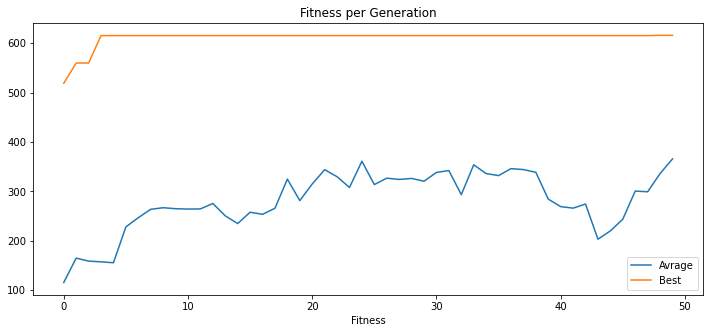

In [5]:
plt.figure(figsize=(12,5))

plt.xlabel('Generation')
plt.xlabel('Fitness')
plt.title("Fitness per Generation")

plt.plot(range(NumberOfGenerations), avg, label = 'Avrage')
plt.plot(range(NumberOfGenerations), best, label = 'Best')

plt.legend()
plt.show()

# Top configuration

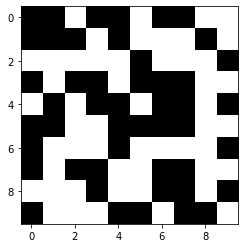

In [6]:
top = list(np.argsort(currentFitness)[::-1][:1]) 
top = population[top,:,:]

plt.imshow(top[0,20:30,20:30], cmap = "Greys")
plt.show()

In [7]:
Bestfitness = run(top[0,:,:], Visualization =True)
print("Best fitness: {}".format(Bestfitness))

Best fitness: 616.0
